In [1]:
#importing required library which is used to import dataset 
import numpy as np 
import pandas as pd
import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix 
print("cell running succesfully")




cell running succesfully


In [2]:
#importing dataset
newdf=pd.read_csv('telecom.csv')
newdf.head()
newdf.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
#NUll----> accuracy(--)# 

# data preprocessing 
# NULL value eliminate
# ammount : - 10 , 40, 20, 23, NULL, 23, 40
# drop(ammount) - > mean --->NULL
# regression , classification---------(ML Models --- > decision treee  , randomforest , ANN)
# (binary)classification   --->YES/NO
# yes(1) / no(0)
# one hot encoding
#payment = electronic mail , mailcheck,credit
#payment_electronic_bills --> yes , no , no
#payment_check-------------->no ,yes , no

#payment_credit_card------->no


In [4]:
newdf.isnull().sum().sum()


0

0

0

0

In [5]:
 
newdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#total cherges column was detected as object we will change it to the numeric data
newdf['TotalCharges']=pd.to_numeric(newdf['TotalCharges'],errors='coerce')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
newdf.dropna(inplace=True)

In [8]:
#remove CustomerId column
newdf.drop(columns='customerID',inplace=True)
newdf.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [9]:
newdf.PaymentMethod.unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
#removing automatic 
newdf['PaymentMethod']=newdf['PaymentMethod'].str.replace(' (automatic)',  '',regex=False)
newdf.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [11]:
#importing Libraries for Data Visualization
import matplotlib.pyplot as plt


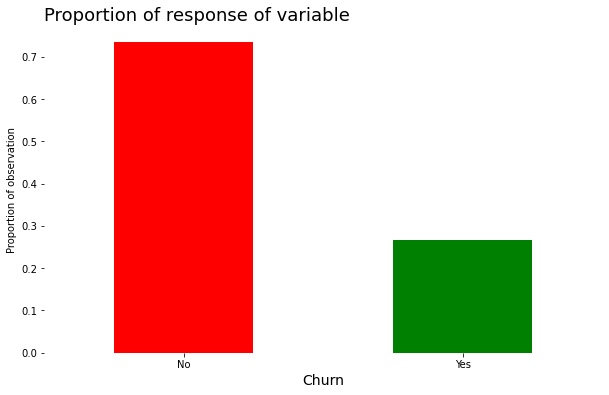

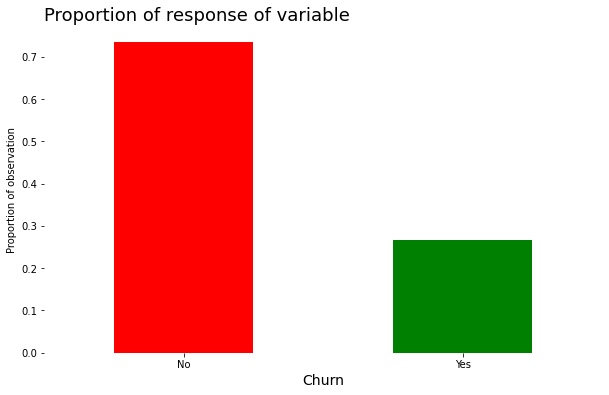

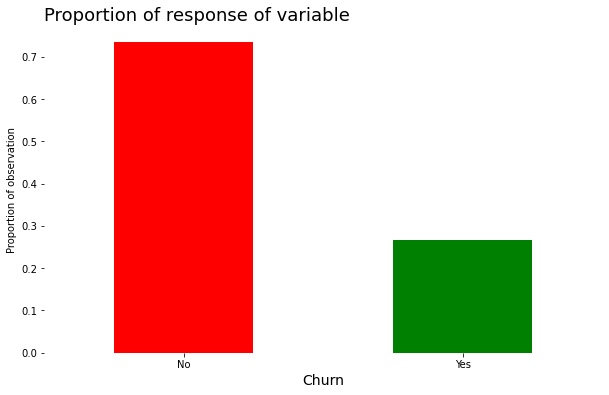

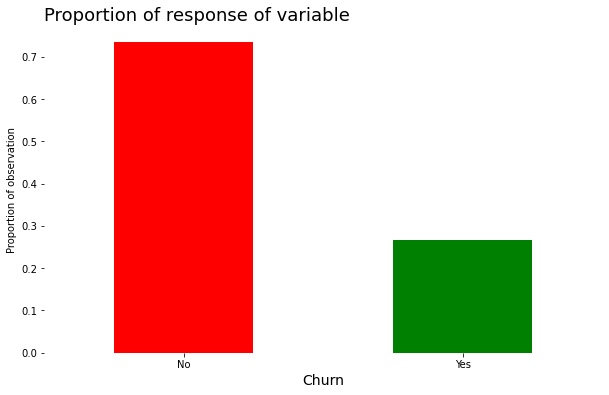

In [12]:
#create a figure
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

# proportion of observation of each class
prop_response=newdf['Churn'].value_counts(normalize=True)

#create a bar plot to showing percentage of churn 
prop_response.plot(kind='bar',ax=ax,color=['red','green'])



#set title and labels 
ax.set_title('Proportion of response of variable',fontsize=18, loc='left')

ax.set_xlabel('Churn',fontsize=14)
ax.set_ylabel('Proportion of observation')

ax.tick_params(rotation='auto')

#eliminate the frame from plot 
spine_names=('top','right','bottom','left')

for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)
  




In [13]:
# def percentage_stacked_plot(column_to_plot, super_title):
#     number_of_columns=2
#     number_of_rows= math.ceil(len(column_to_plot)/2)
    
#     # to create a figure
#     fig=plt.figure(figsize=(12,5*no_of_rows))
#     fig.suptitle(super_title, fontsize=22,y=.95)
    
#     # loop to each column name to create a subplot
    
#     for index,column in enumerate(column_to_plot,1):
#         
        
#         #create a subplot
#         ax=fig.add_subplot(number_of_rows,number_ofcolumn,index)
#         prop_by_independent=pd.crosstab(newdf[column],newdf['Churn']).apply(lambda x: x/x.sum()*100,axis=1 )
#         prop_by_independent.plot(kind='bar',ax=ax,stacked=True,rot=0,color['red','green'])
        
#         #set the legend in the top of the table
        
#         ax.legend(loc='upper right',bbox_to_anchor=(0.62,0.5,0.5,0.5),title='Churn',fancybox=True)
        
#         #set Title and lables
        
#         ax.set_title('Proportion of observation by' +column,fontsize=16, loc='left')
        
        
#         ax.tick_params(rotation='auto')
        
#         #eliminate the frame from the slot
#         spine_names  =  ('top','right','bottom','left')
#         for spine_name in spine_names:
#             ax.spines[spine_name].set_visible(False)
    
    

In [14]:
# demographic_columns=['gender','Seniorcitizenship','Partner','Dependents']

# percentage_stacked_plot(demographic_columns,'Demographic Information')

In [15]:
def compute_mutual_info(categorical_serie):
    return sklearn.metrics.mutual_info_score(categorical_serie,newdf.Churn)

categorical_variables=newdf.select_dtypes(include=object).drop('Churn',axis=1)

feature_importance=categorical_variables.apply(compute_mutual_info).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64
Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64
Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetServi

In [16]:
df_transform=newdf.copy()
lable_encoding_columns=['gender','Partner','Dependents','PaperlessBilling','PhoneService','Churn']

for column in lable_encoding_columns:
    if column=='gender':
        df_transform[column]= df_transform[column].map({'Female':1,'Male':0})
    else :
        df_transform[column]=df_transform[column].map({'Yes':1,'No':0})
df_transform.head()        

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1  Electronic check           29.85         29.85      0  
1                 0      Mailed check           56.95       1889.50      0  
2                 1      Mailed check           53.85        108.15      1  
3                 0     Bank transfer           42.30       1840.75      0  
4                 1  Electronic check           70.70        151.65      1

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1  Electronic check           29.85         29.85      0  
1                 0      Mailed check           56.95       1889.50      0  
2                 1      Mailed check           53.85        108.15      1  
3                 0     Bank transfer           42.30       1840.75      0  
4                 1  Electronic check           70.70        151.65      1

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1  Electronic check           29.85         29.85      0  
1                 0      Mailed check           56.95       1889.50      0  
2                 1      Mailed check           53.85        108.15      1  
3                 0     Bank transfer           42.30       1840.75      0  
4                 1  Electronic check           70.70        151.65      1

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1  Electronic check           29.85         29.85      0  
1                 0      Mailed check           56.95       1889.50      0  
2                 1      Mailed check           53.85        108.15      1  
3                 0     Bank transfer           42.30       1840.75      0  
4                 1  Electronic check           70.70        151.65      1

In [17]:
one_hot_encoding_column=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

df_transform=pd.get_dummies(df_transform,columns=one_hot_encoding_column)

In [18]:
min_max_columns=['tenure','MonthlyCharges','TotalCharges']

for column in min_max_columns:
    min_column=df_transform[column].min()
    
    max_column=df_transform[column].max()
    
    df_transform[column]=(df_transform[column]-min_column)/(max_column - min_column)
    
    
print("Running Succesfully")    
    

Running Succesfully
Running Succesfully
Running Succesfully
Running Succesfully


In [19]:
# Machine learnig algo 


X = df_transform.drop(columns='Churn')

Y = df_transform.loc[:,'Churn']

print(X.columns)

print(Y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

In [20]:
# Split the data in training and testing
X_train, X_test , Y_train , Y_test= train_test_split(X,Y,test_size=0.20,random_state=40,shuffle=True)
print('succesfully runned !')

succesfully runned !
succesfully runned !
succesfully runned !
succesfully runned !


In [21]:
#data normalization with sklearn
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,Y)


DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

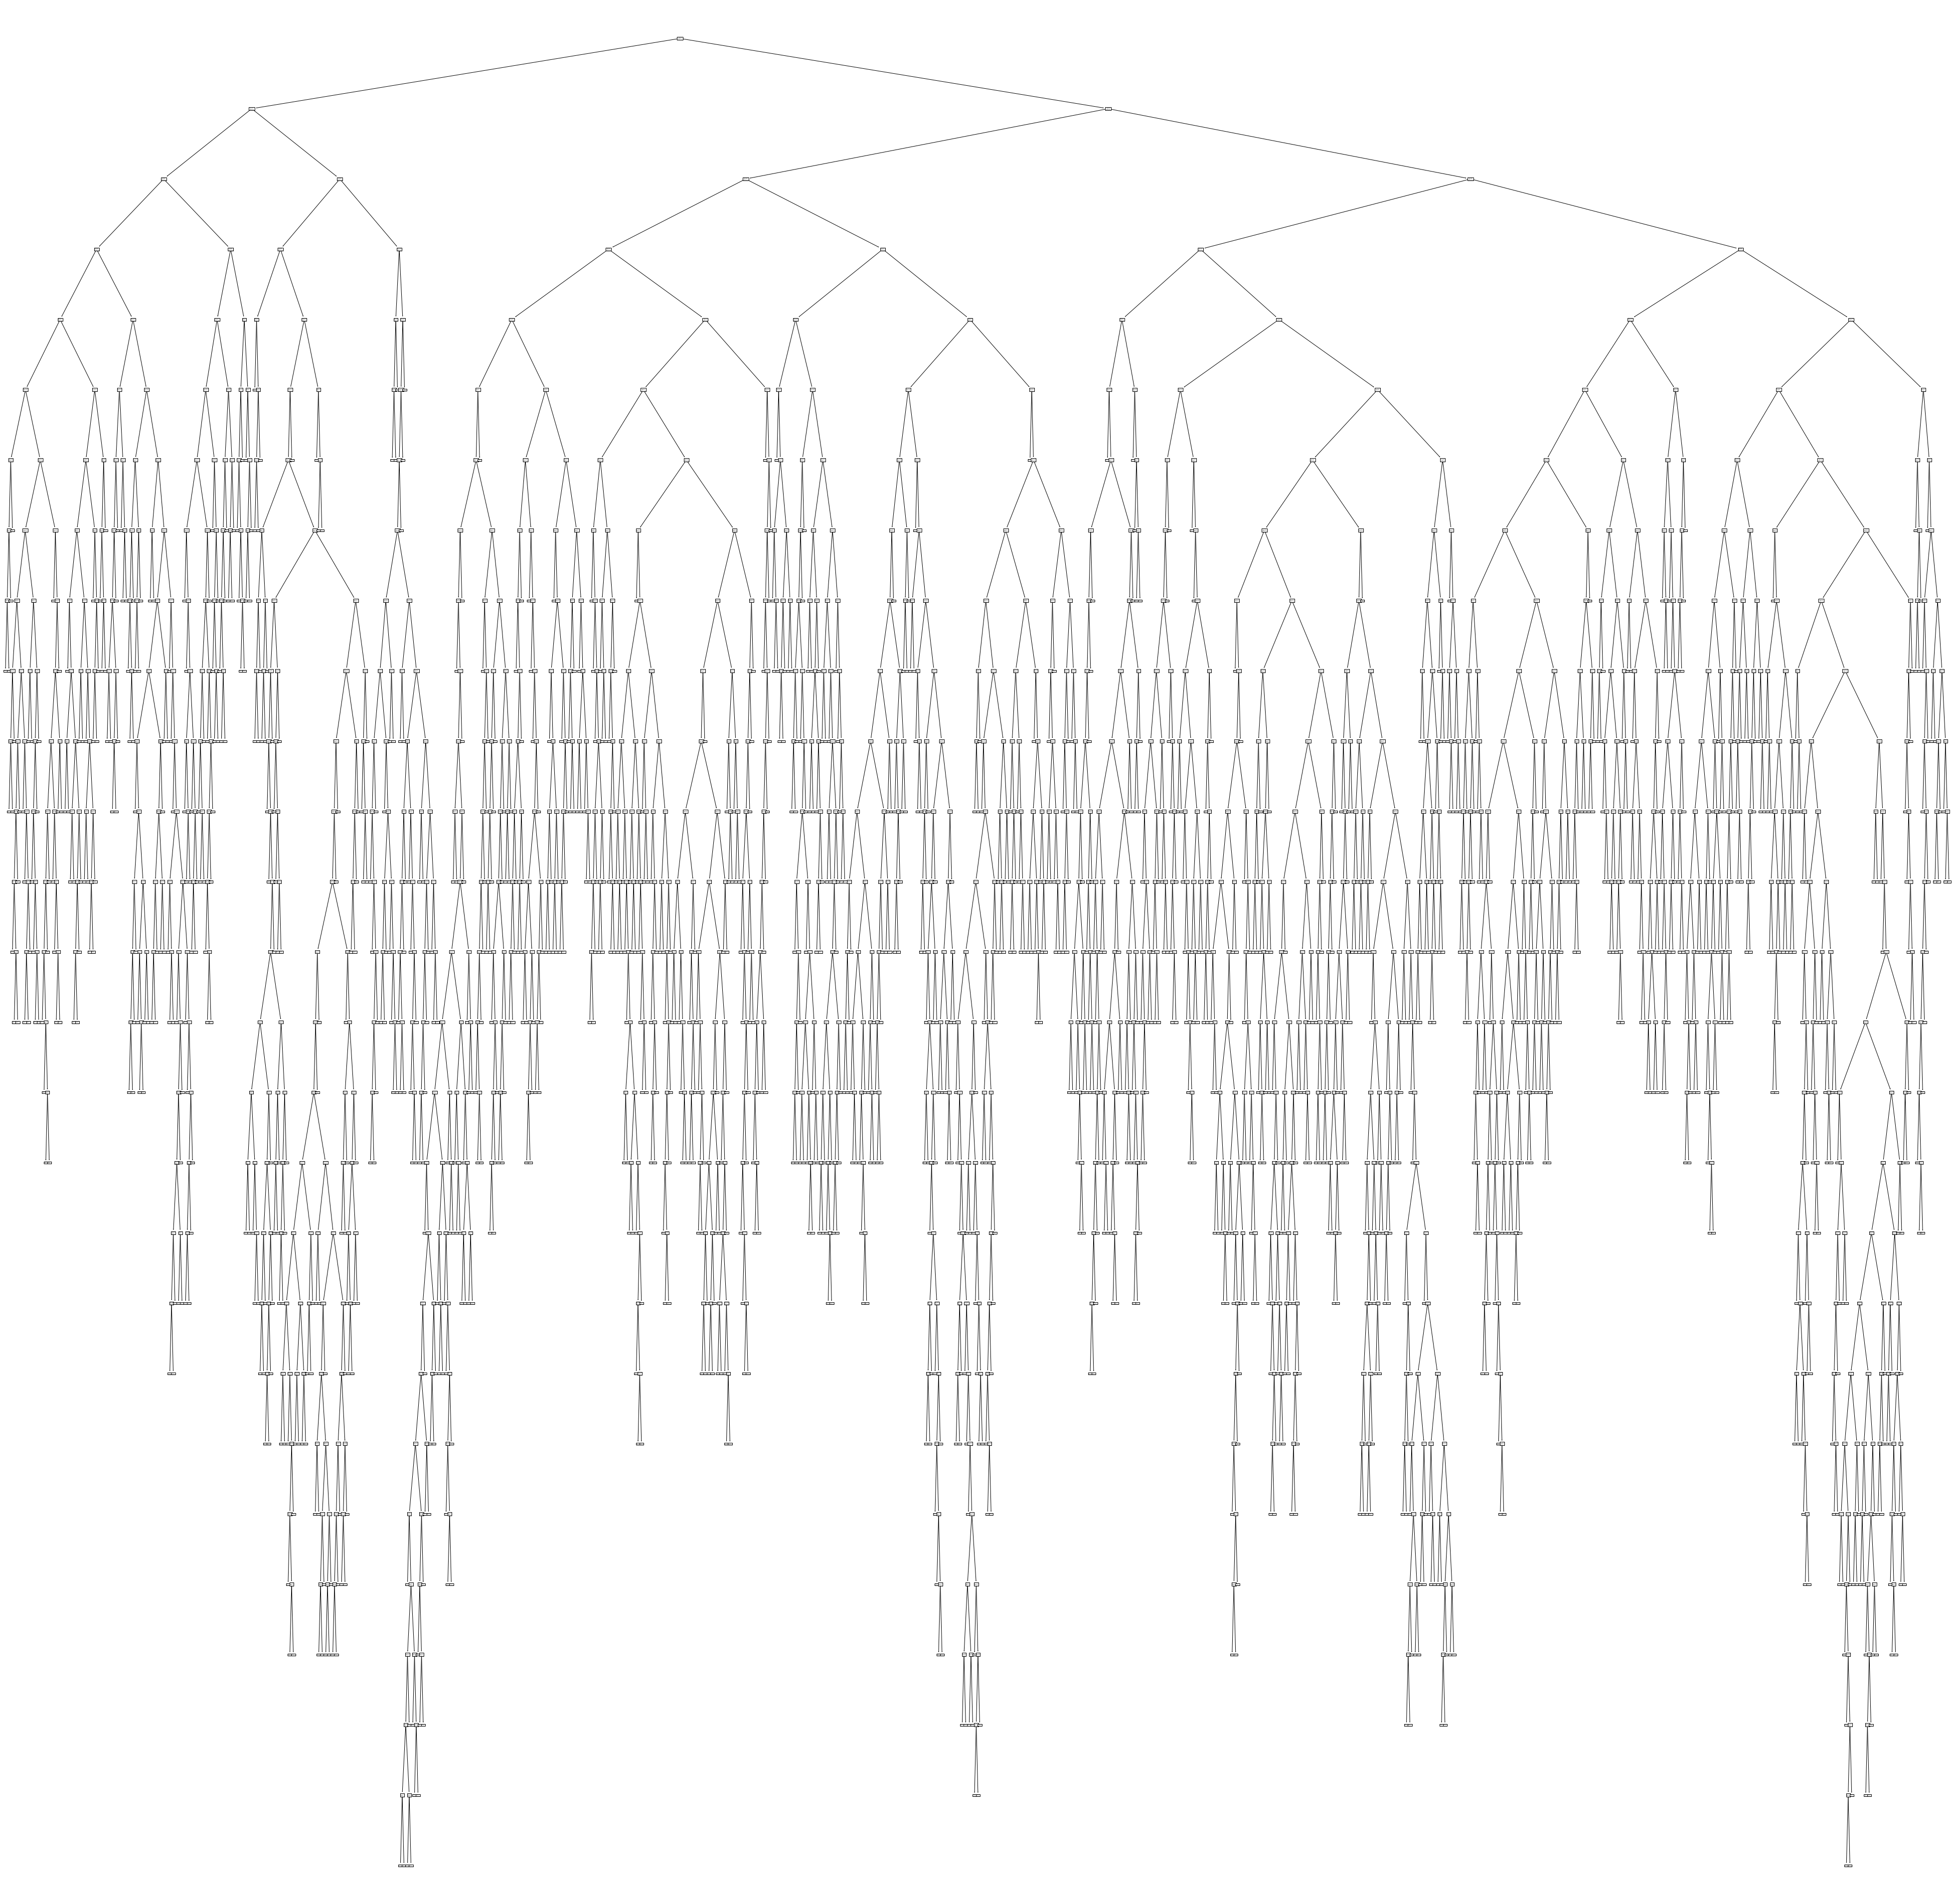

Success!


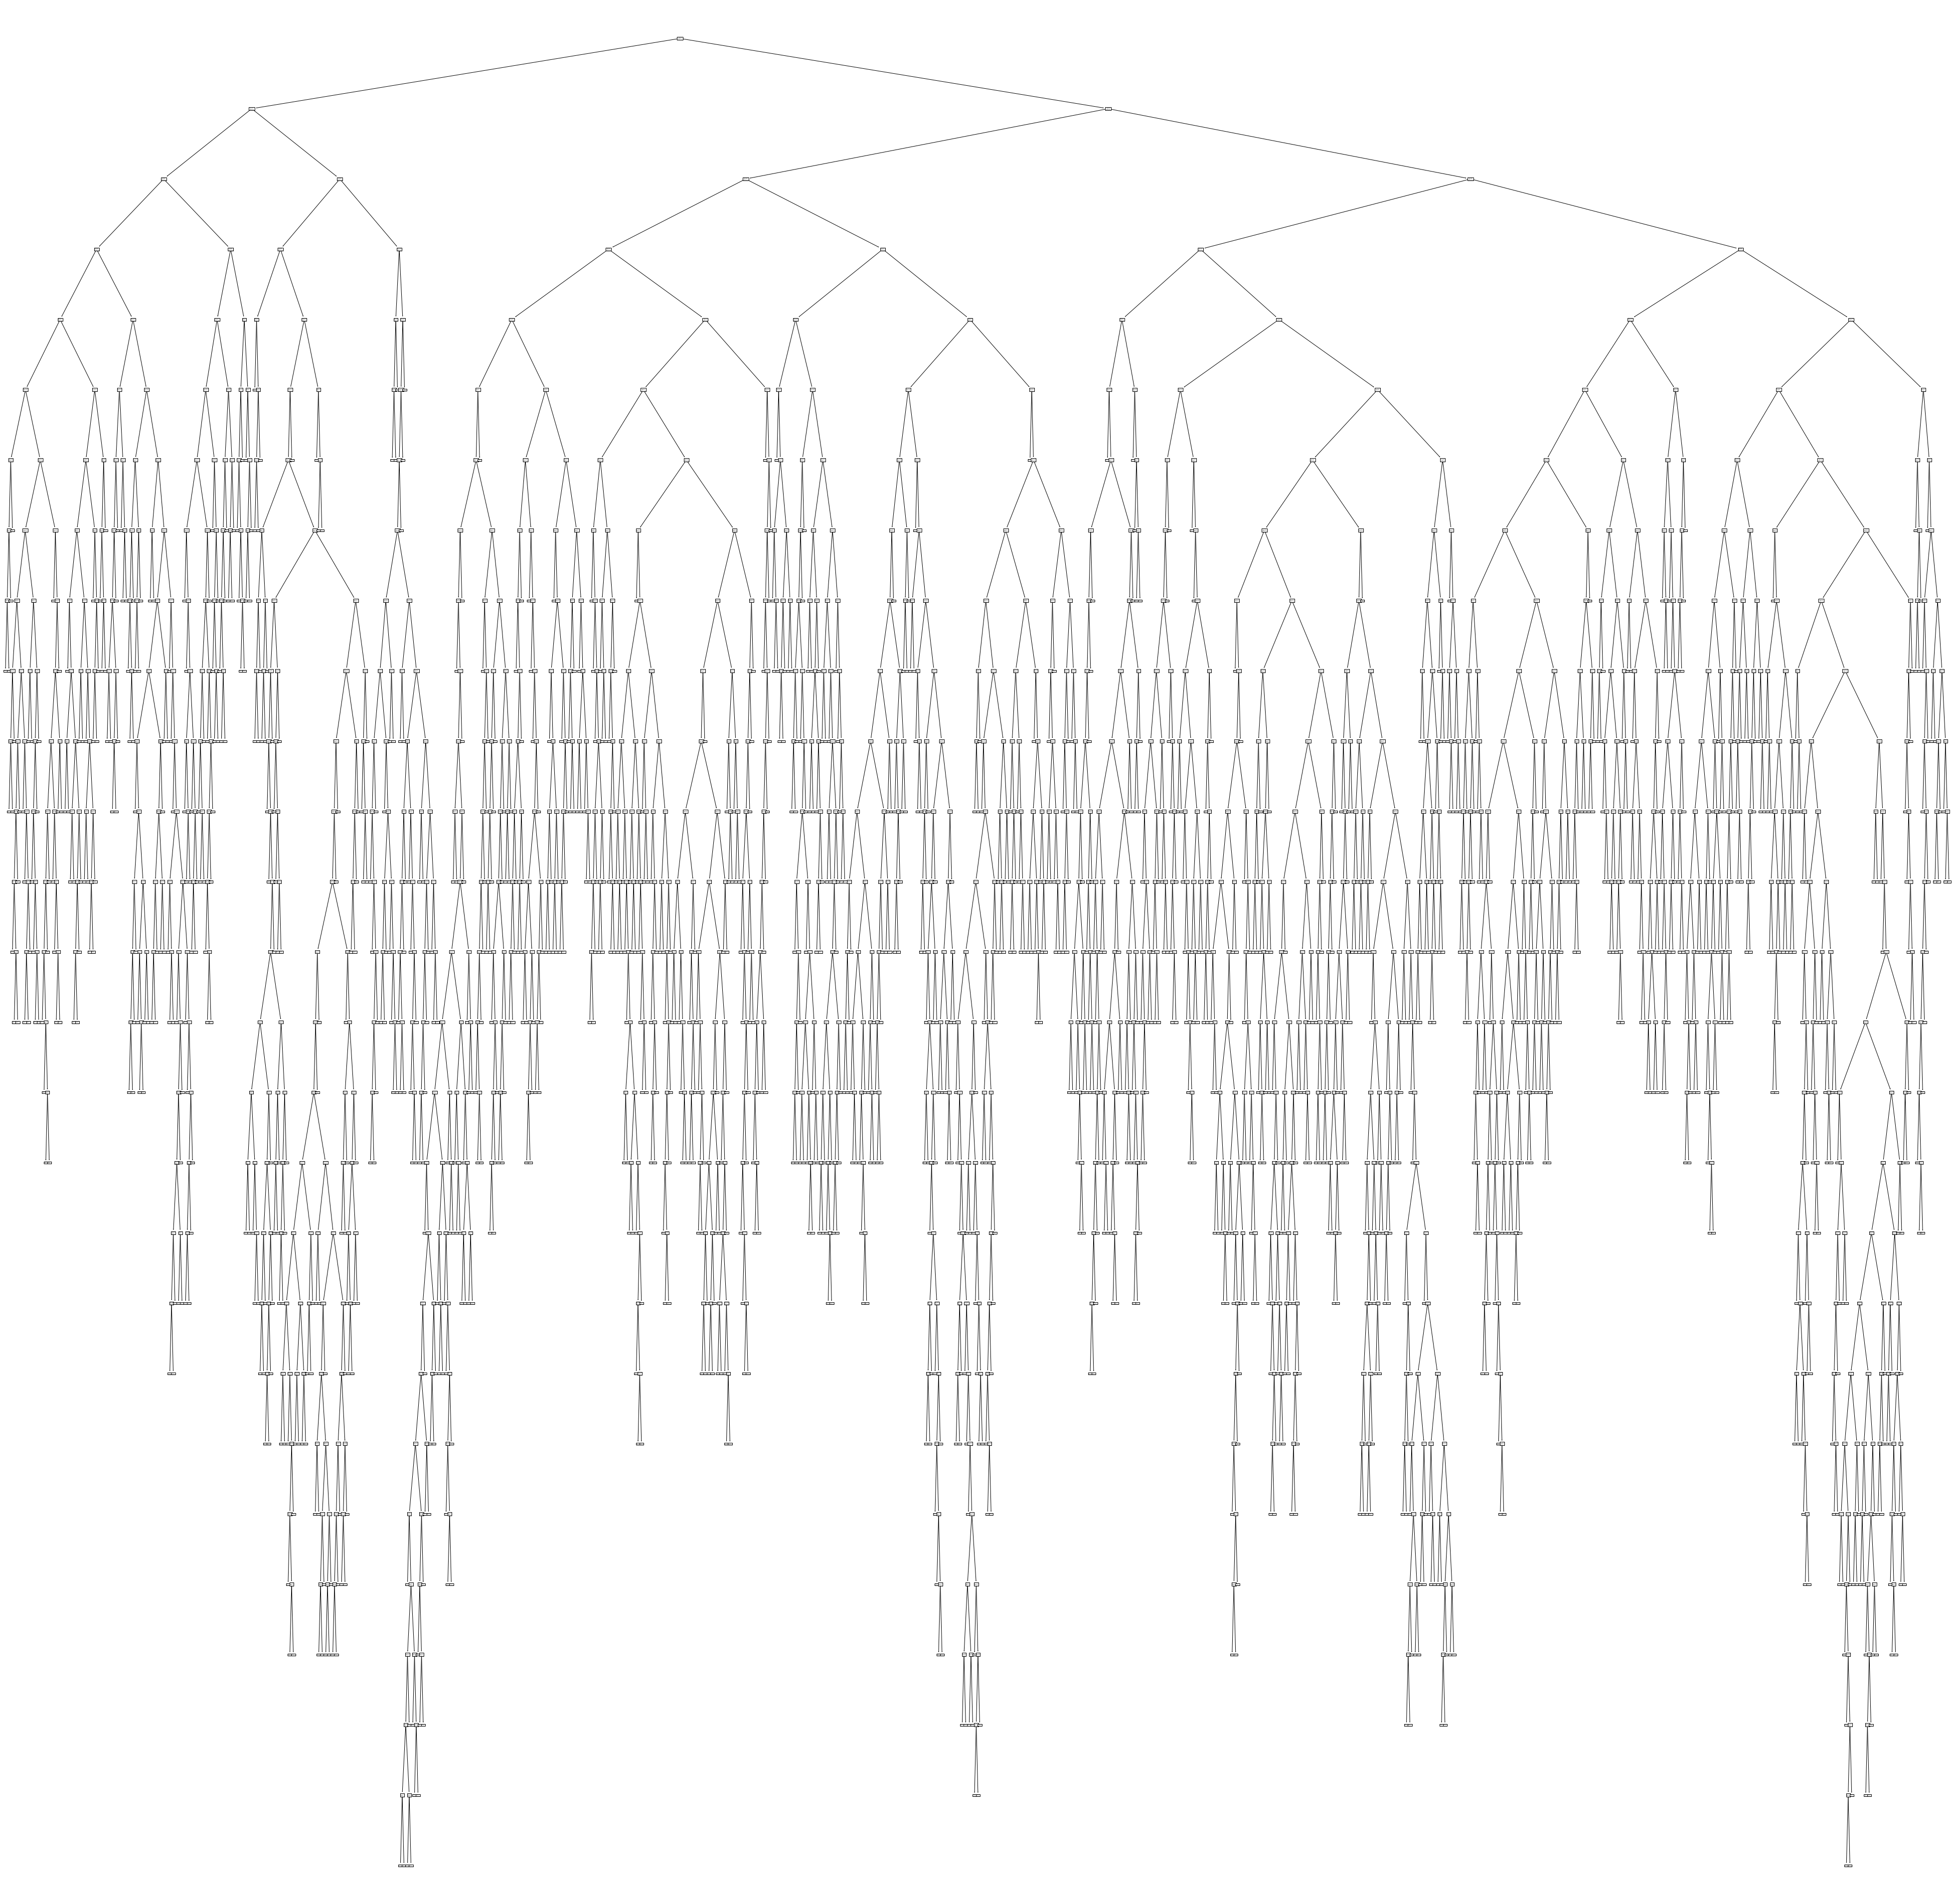

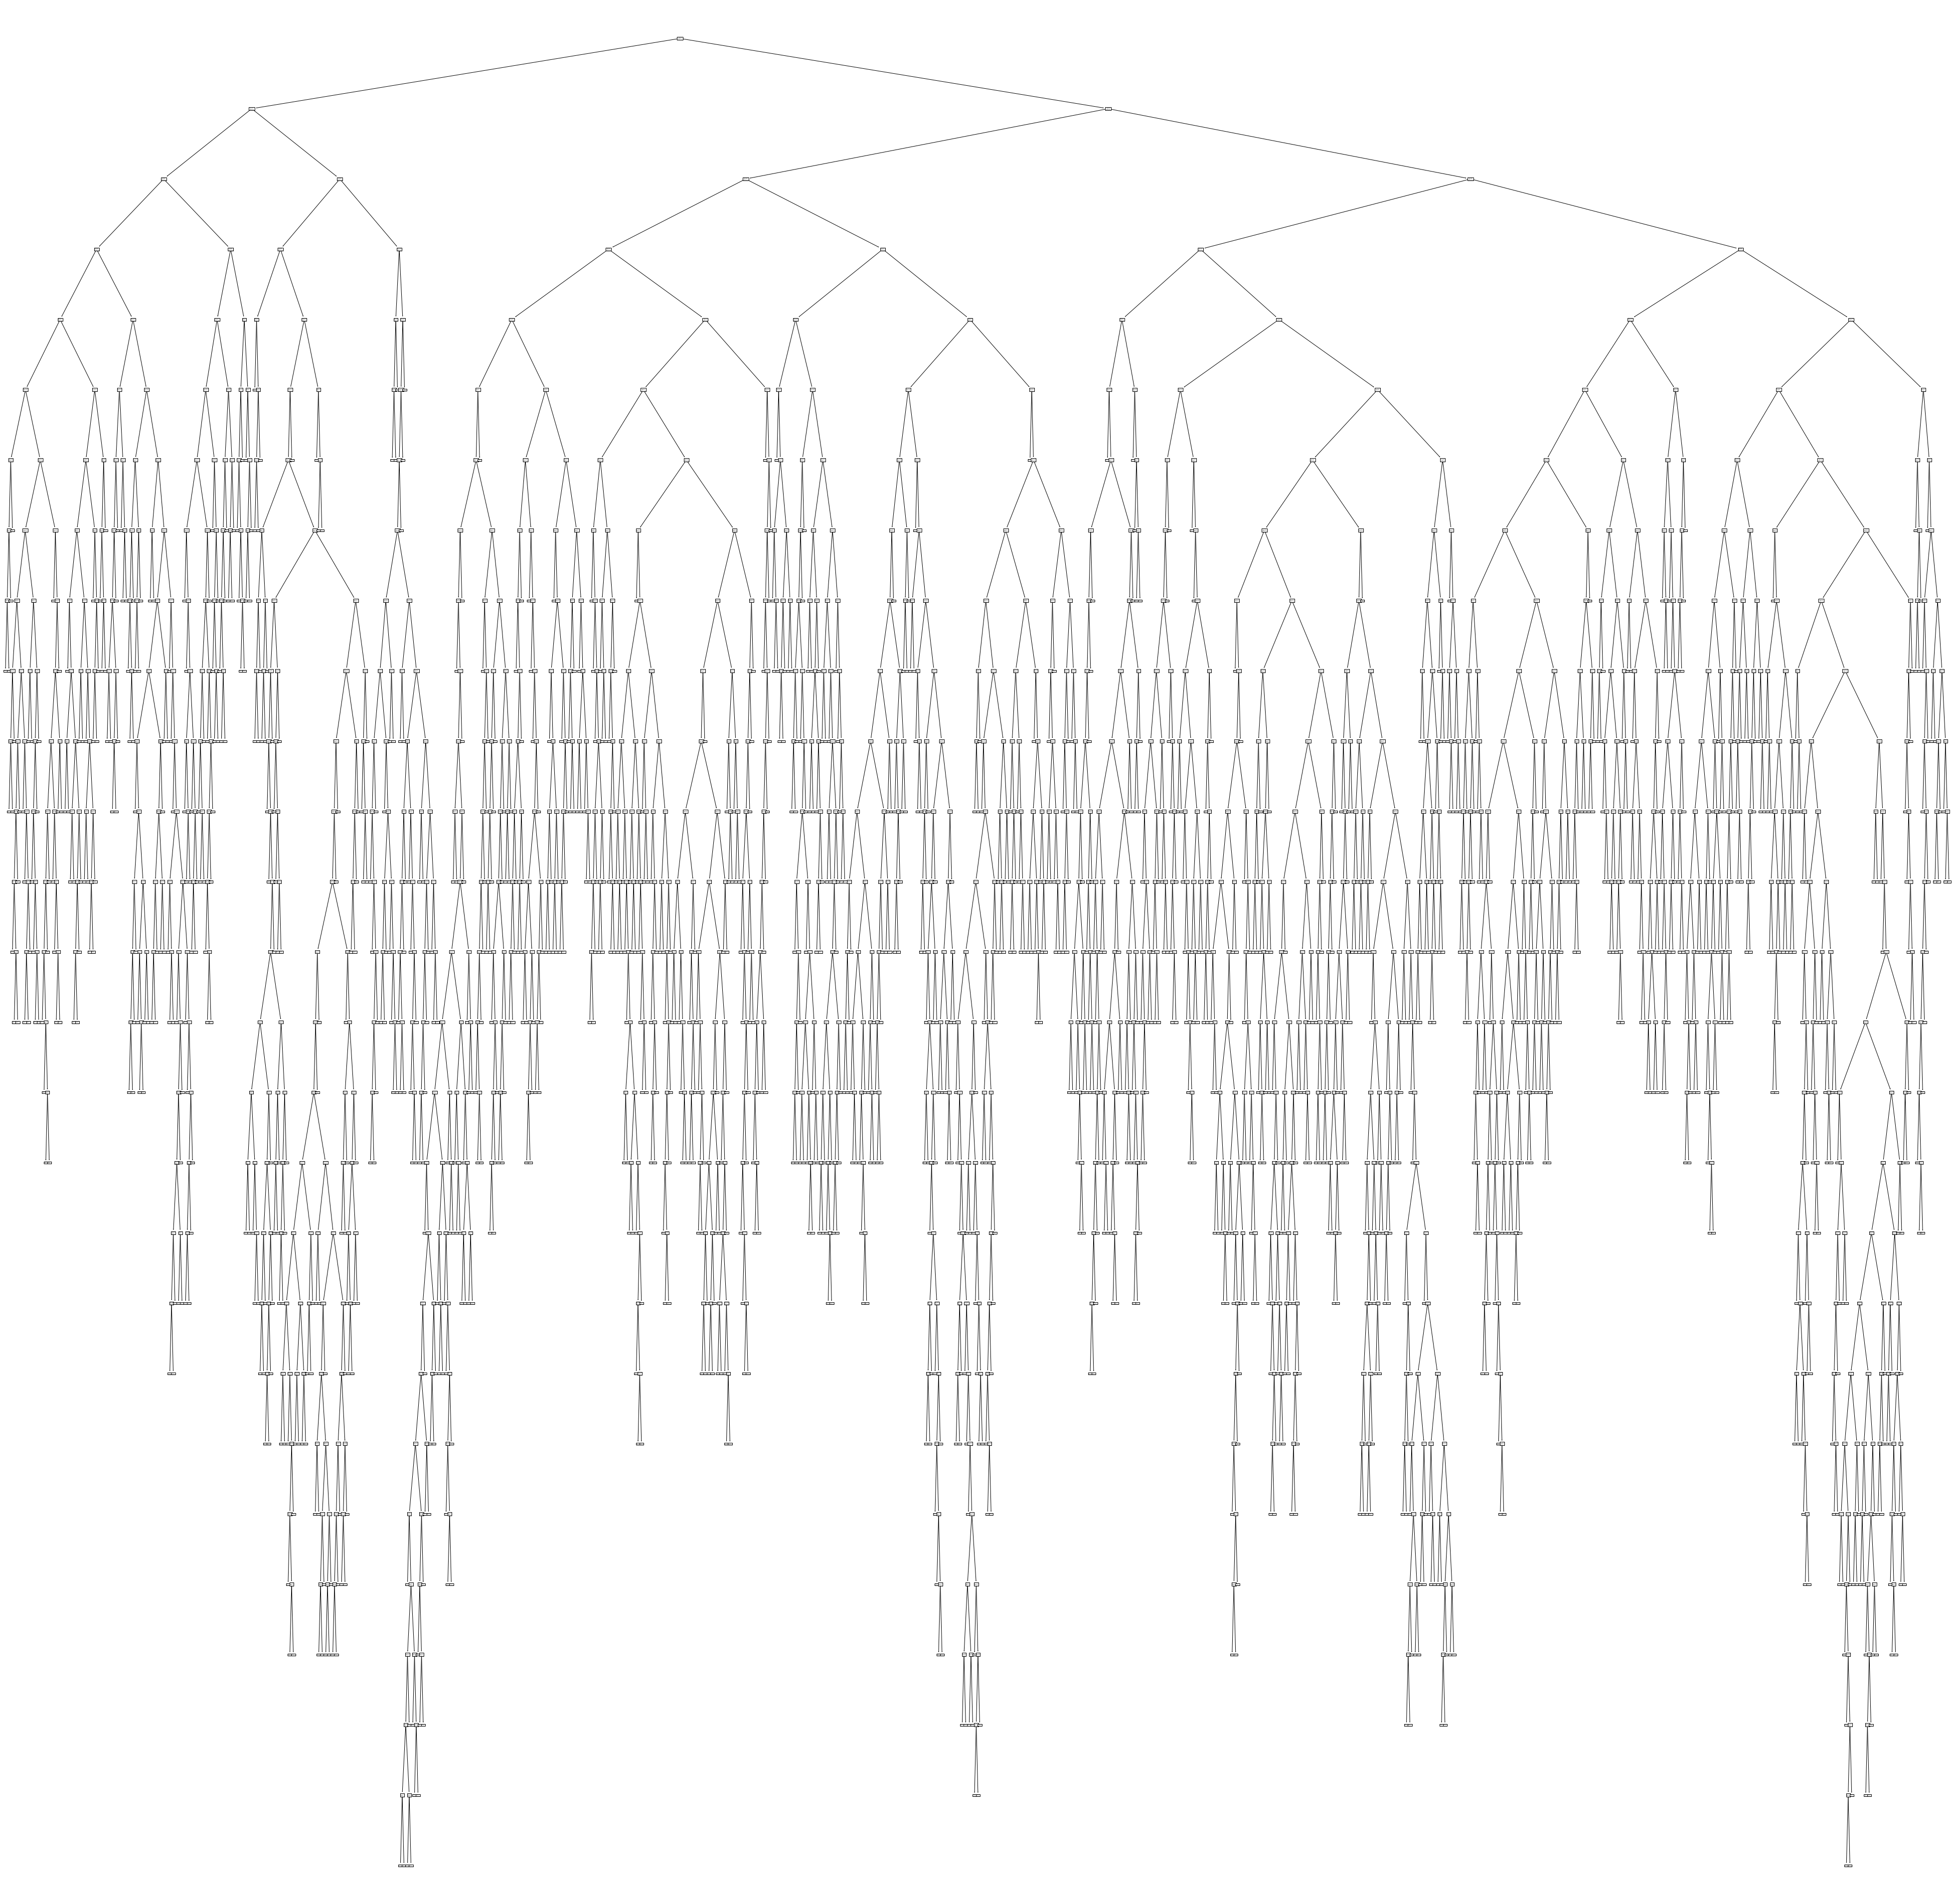

Success!
Success!


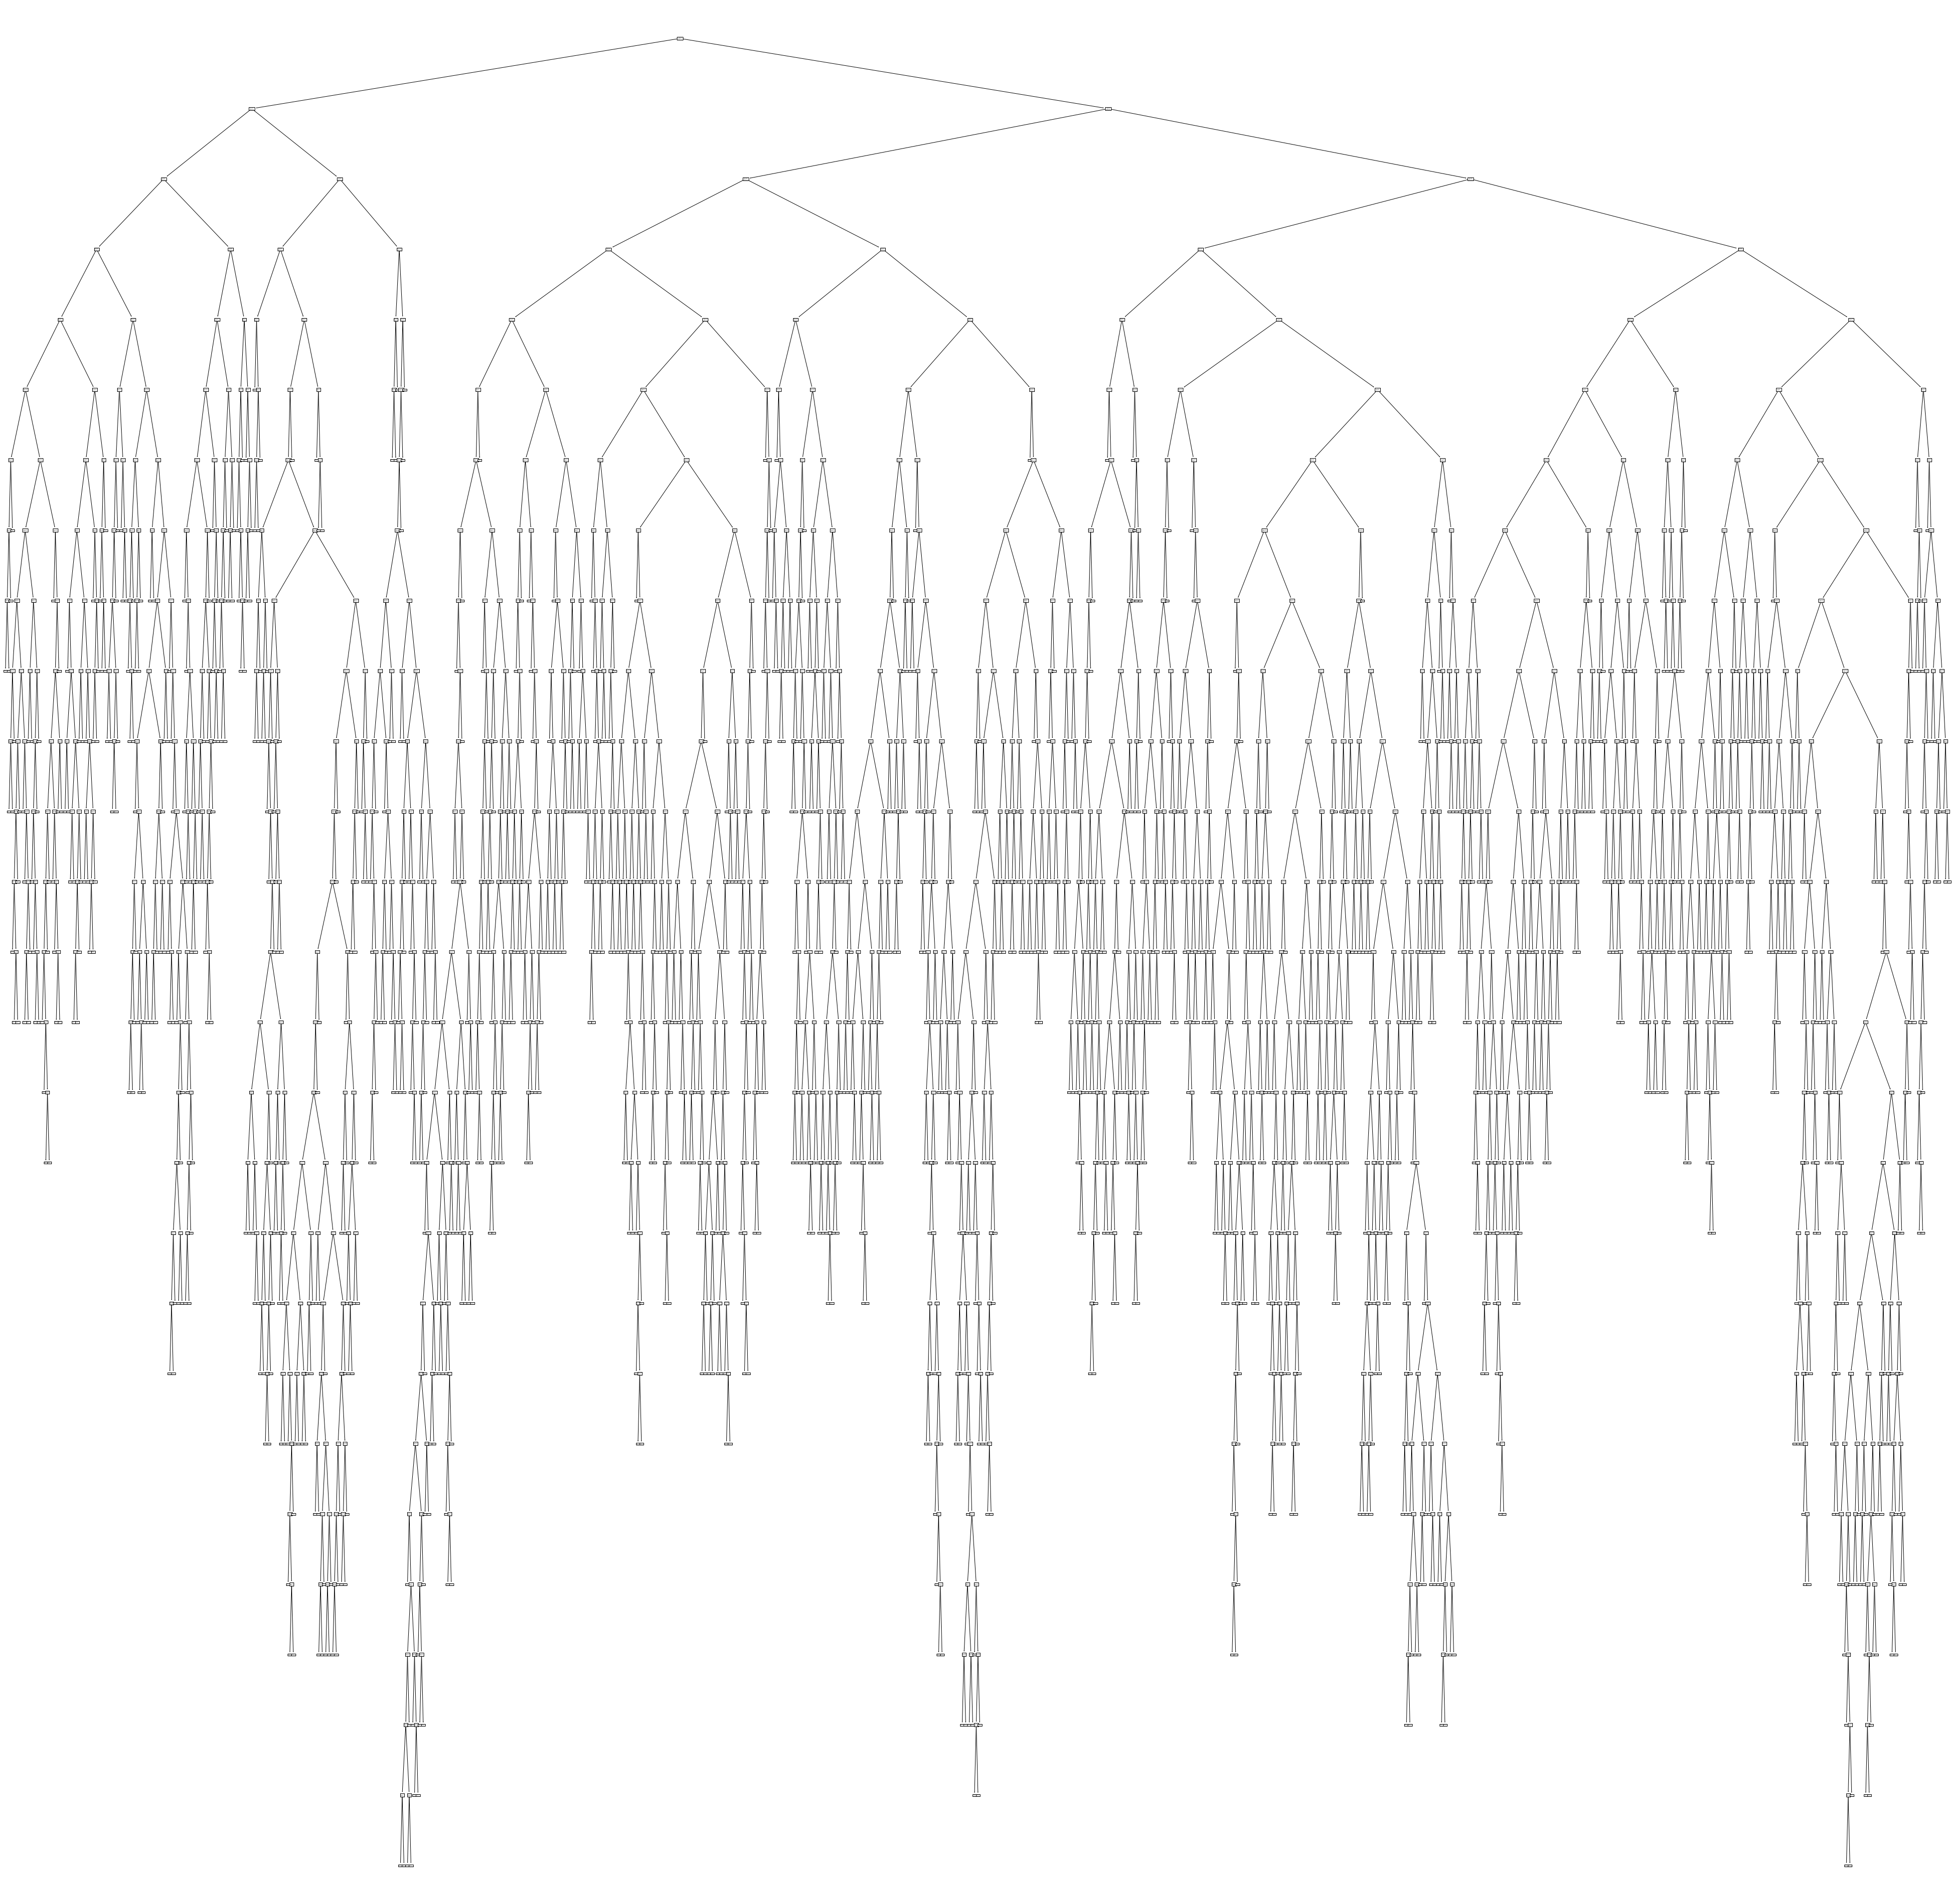

Success!


In [23]:
from sklearn import tree
plt.figure(figsize=(70,70))
tree.plot_tree(model,filled=False)
plt.show()
print("Success!")

In [24]:
from sklearn.model_selection import cross_val_score


In [25]:
dt_cv = DecisionTreeClassifier()
print("Cross_validation_Accuracy\n")
cv_dt = cross_val_score(dt_cv,X_train,Y_train, cv=5,scoring='accuracy').mean()
print('For Decision Trees Classifier :',round(cv_dt,3))



Cross_validation_Accuracy

Cross_validation_Accuracy

Cross_validation_Accuracy

Cross_validation_Accuracy

For Decision Trees Classifier : 0.731
For Decision Trees Classifier : 0.731
For Decision Trees Classifier : 0.731
For Decision Trees Classifier : 0.731


In [26]:
rdf = RandomForestClassifier(criterion = 'entropy')

In [27]:
dt_cv.fit(X_train, Y_train)
# XGBoostclassifier.fit(X_train, Y_train)
rdf.fit(X_train, Y_train)
# SVMclassifier.fit(X_train, Y_train)
# LOGISTICclassifier.fit(X_train, Y_train)
# KNNclassifier.fit(X_train, Y_train)
# GNBclassifier.fit(X_train, Y_train)
# BaggingClassifier.fit(X_train, Y_train)
# NeuralNetworkClassifier.fit(X_train, Y_train)
# CatBoost.fit(X_train, Y_train)
# GBM.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

RandomForestClassifier(criterion='entropy')

RandomForestClassifier(criterion='entropy')

RandomForestClassifier(criterion='entropy')

In [28]:
dtpred = dt_cv.predict(X_test)
dtaccuracy = accuracy_score(Y_test,dtpred)
print("the accuracy of the decision tree classifier: ",dtaccuracy)

the accuracy of the decision tree classifier:  0.7121535181236673
the accuracy of the decision tree classifier:  0.7121535181236673
the accuracy of the decision tree classifier:  0.7121535181236673
the accuracy of the decision tree classifier:  0.7121535181236673


In [29]:
rdfpred = rdf.predict(X_test) 
rdfaccuracy = accuracy_score(Y_test,rdfpred)
print("the accuracy of the random forest classifier: ",rdfaccuracy)

the accuracy of the random forest classifier:  0.7633262260127932
the accuracy of the random forest classifier:  0.7633262260127932
the accuracy of the random forest classifier:  0.7633262260127932
the accuracy of the random forest classifier:  0.7633262260127932


In [30]:
#confusion matrix and classification report of the the models 
# Random Forest 
cmRF = confusion_matrix(Y_test,rdfpred)
cmRF


array([[908, 142],
       [191, 166]], dtype=int64)

array([[908, 142],
       [191, 166]], dtype=int64)

array([[908, 142],
       [191, 166]], dtype=int64)

array([[908, 142],
       [191, 166]], dtype=int64)

In [31]:
print(classification_report(Y_test,rdfpred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1050
           1       0.54      0.46      0.50       357

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.75      0.76      0.76      1407

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1050
           1       0.54      0.46      0.50       357

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.75      0.76      0.76      1407

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1050
           1       0.54      0.46      0.50       357

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.75      0.76      0.76      1407

              preci

In [32]:
# Decision  tree
cmdt = confusion_matrix(Y_test,dtpred)
cmdt

array([[824, 226],
       [179, 178]], dtype=int64)

array([[824, 226],
       [179, 178]], dtype=int64)

array([[824, 226],
       [179, 178]], dtype=int64)

array([[824, 226],
       [179, 178]], dtype=int64)

In [33]:
print(classification_report(Y_test,dtpred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1050
           1       0.44      0.50      0.47       357

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1050
           1       0.44      0.50      0.47       357

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1050
           1       0.44      0.50      0.47       357

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407

              preci

In [34]:
# By applying K-Fold Cross Validation
accuracies = cross_val_score(estimator = dt_cv, X= X_train , y=Y_train,cv = 100)
print("The accuracy of decision tree :",accuracies.mean()*100)

The accuracy of decision tree : 73.1218671679198
The accuracy of decision tree : 73.1218671679198
The accuracy of decision tree : 73.1218671679198
The accuracy of decision tree : 73.1218671679198


In [35]:
accuracies7 = cross_val_score(estimator = rdf, X = X_train, y = Y_train, cv=100)
print("Accuracy for Random Forest : {:.2f} %".format(accuracies7.mean()*100))

Accuracy for Random Forest : 79.44 %
Accuracy for Random Forest : 79.44 %
Accuracy for Random Forest : 79.44 %
Accuracy for Random Forest : 79.44 %


In [36]:
rdf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# save the final model 
import pickle
pickle.dump(rdf,open('rdf','wb'))



In [38]:
my_model = pickle.load(open('rdf','rb'))


In [39]:
Predictor = my_model.predict([[1,0,1,0,0.00000,0,1,0.115,0.0125,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [40]:
# def input_features(l[[]]):
#     for i in l:
#         i = 0 
        

In [41]:
Predictor
def prediction(Predictor):
    if(Predictor[0]==[0]):
        print("Customer is not churning :")
    else:
        print("Customer is churning: ")
prediction(Predictor)        

Customer is not churning :
Customer is not churning :
Customer is not churning :
Customer is not churning :
